In [124]:
# On importe les librairies dont on aura besoin pour ce tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [125]:
sns.set()

In [126]:
# On charge le dataset
data = pd.read_csv('hubble_data.csv', sep=',')

In [127]:
data

,distance,recession_velocity
0,0.032,170
1,0.034,290
2,0.214,-130
3,0.263,-70
4,0.275,-185
5,0.275,-220
6,0.450,200
7,0.500,290
8,0.500,270
9,0.630,200


# Vue avec Matplotlib

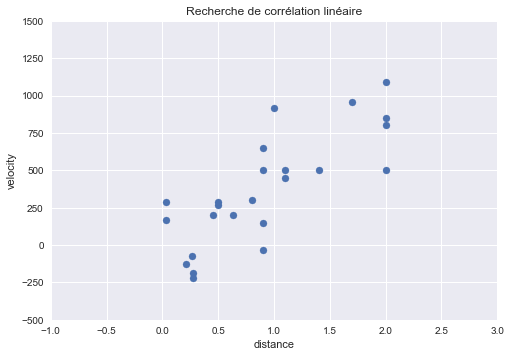

In [128]:
x_df = data['distance']
y_df = data['recession_velocity']

fig = plt.figure()
ax = plt.axes()
plt.scatter(x_df, y_df)
plt.title("Recherche de corrélation linéaire")
plt.axis([-1, 3, -500, 1500]);

# Titres des axes
ax = ax.set(xlabel='distance', ylabel='velocity')

# Vue avec Seaborn

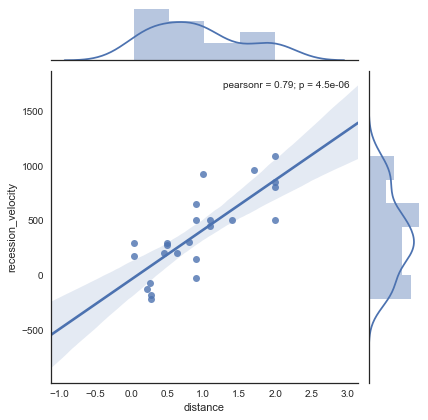

In [129]:
with sns.axes_style('white'):
    sns.jointplot("distance", "recession_velocity", data=data, kind='reg')

# Régression linéaire

In [130]:
#Appliquons l'algorithme de regression linéaire p
X = np.matrix(data['distance']).T
y = np.matrix(data['recession_velocity']).T

reg = linear_model.LinearRegression()

#On sépare les données d'entrainement et de test dans un ratio de 8%
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)
#On entraine le modèle
reg.fit(Xtrain, ytrain)
ypred =reg.predict(Xtest)

# on ne mesure pas l'erreur ici du modèle car ce n'est pas l'objectif


/Users/PABIOT/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## visualisation

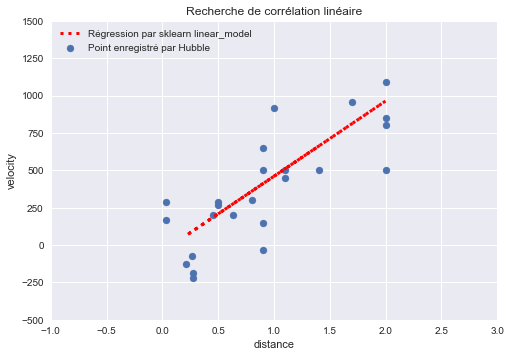

In [131]:
fig = plt.figure()
ax = plt.axes()
plt.scatter(x_df, y_df, label='Point enregistré par Hubble')
plt.plot(Xtest, ypred, color='red', linestyle = 'dotted', linewidth=3,label='Régression par sklearn linear_model')
plt.title("Recherche de corrélation linéaire")
plt.axis([-1, 3, -500, 1500]);

# Titres des axes
ax.set(xlabel='distance', ylabel='velocity')
plt.legend (loc='upper left')